In [1]:
#Packages and fonts
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
newfont = {"fontname": "serif"}

In [2]:
#Figures and unpickling
fig1 = plt.imread("Danial paper 444 QUALITY.PNG") #The picture backgrounds
fig2 = plt.imread("Danial paper 770 QUALITY.PNG")
with open("all_catalogue.pickle", "rb") as handle: #unpickling all_catalogue
    catalogue = pkl.load(handle)

In [3]:
#colormap, photo-z collection
redshift = np.genfromtxt("photz.zout", skip_header=2, delimiter=None) #getting photometric redshift results
redshiftt = np.transpose(redshift)
red = redshiftt[17] #the photometric redshift
lists = catalogue.keys()
sm = cm.colormaps["gist_rainbow"] #colorbar
index = 0 #index trick...
for i in lists: #adding photo-z to catalogue
    catalogue[i]["photo-z"] = red[index]
    index += 1

In [4]:
#MUSE redshift collection, and photo-z errors
museshift = [] #muse catalogue redshifts, lower and upper bounds for photo-z´s.
musecompare = []
u68 = np.array([])
l68 = np.array([])
index = 0
for i in lists:
    if "MUSE_data" in catalogue[i].keys():
        museshift.append(catalogue[i]["MUSE_data"]["z_muse"])
        musecompare.append(catalogue[i]["photo-z"])
        u68 = np.append(u68, redshiftt[10][index])
        l68 = np.append(l68, redshiftt[9][index])
    index += 1

upper_limit = u68 - np.asarray(musecompare)
lower_limit = np.asarray(musecompare) - l68

In [5]:
#Calculating outlier fraction(outfrac), and making lists of non-outliers and their errors for later plotting
count = 0 #outlier count
outfrac = 0
muse2 = []
phot2 = []
photer2u = [] #recording the lower and upper bounds for non-outliers 
photer2l = []
for i in range(len(museshift)):
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) > 0.15:
        count += 1
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) < 0.15:
        muse2.append(museshift[i])
        phot2.append(musecompare[i])
        photer2l.append(lower_limit[i])
        photer2u.append(upper_limit[i])
    outfrac = count/len(museshift)
print(outfrac, "really bad")

0.4883720930232558 really bad


In [6]:
#Relevant magnitude data collection
#fig1
M710fig1 = np.array([]) #f770w-f100w fig1
M47 = np.array([]) #f444w-f770w
M710fig1e = np.array([]) #f770w-f100w error
M47e = np.array([]) #f444w-f770w error
redfig1 = np.array([]) #redshift for detections
index = 0
for i in lists:
    if float(catalogue[i]["f770w"]["MAGERR_APER"]) < 99 and float(catalogue[i]["f444w"]["MAGERR_APER"]) < 99 and float(catalogue[i]["f1000w"]["MAGERR_APER"]) < 99:
        M710fig1 = np.append(M710fig1, float(catalogue[i]["f770w"]["MAG_APER"])-float(catalogue[i]["f1000w"]["MAG_APER"]))
        M710fig1e = np.append(M710fig1e, np.sqrt((float(catalogue[i]["f770w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f1000w"]["MAGERR_APER"]))**2))
        M47 = np.append(M47, float(catalogue[i]["f444w"]["MAG_APER"])-float(catalogue[i]["f770w"]["MAG_APER"]))
        M47e = np.append(M47e, np.sqrt((float(catalogue[i]["f444w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f770w"]["MAGERR_APER"]))**2))
        redfig1 = np.append(redfig1, red[index])
    index += 1

#fig2
M710fig2 = np.array([]) #f770w-f100w fig2
M115 = np.array([]) #f1000w-f1500w
M710fig2e = np.array([]) #f770w-f100w error
M115e = np.array([]) #f1000w-f1500w error
redfig2 = np.array([])
index = 0
for i in lists:
    if float(catalogue[i]["f770w"]["MAGERR_APER"]) < 99 and float(catalogue[i]["f1000w"]["MAGERR_APER"]) < 99 and float(catalogue[i]["f1500w"]["MAGERR_APER"]) < 99:
        M710fig2 = np.append(M710fig2, float(catalogue[i]["f770w"]["MAG_APER"])-float(catalogue[i]["f1000w"]["MAG_APER"]))
        M115 = np.append(M115, float(catalogue[i]["f1000w"]["MAG_APER"])-float(catalogue[i]["f1500w"]["MAG_APER"]))
        M710fig2e = np.append(M710fig2e, np.sqrt((float(catalogue[i]["f770w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f1000w"]["MAGERR_APER"]))**2))
        M115e = np.append(M115e, np.sqrt((float(catalogue[i]["f1000w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f1500w"]["MAGERR_APER"]))**2))
        redfig2 = np.append(redfig2, red[index])
    index += 1

#Should be all the magnitude data we need

In [7]:
#Quenched galaxy "boxes":

#fictive data for fig1 plot
boxh = np.array([[-1.5, 0.3], [-0.2, -0.2]]) #horizontal fictive data line
boxv = np.array([[0.3, 0.3], [-0.2, -1]]) #vertical ...

#fictive data for fig2 plot 
fictdatlinear = np.array([[-0.5, -0.2], [-0.15, -0.5]]) #angled line fictional data. x then y
fictdathline = np.array([[-1.5, -0.5], np.ones(2)*-0.15]) #horizontal fictional data line. x then y
fictdatvline = np.array([[-0.2, -0.2], [-0.5,-1.5]]) #vertical fictional data line. x then y
fictslope = [(-0.35/0.3), (-0.15+0.5*(-0.35/0.3))]#slope and value at y=0 for later. for ficdatlinear. a, then b.
print(fictslope)

[-1.1666666666666667, -0.7333333333333334]


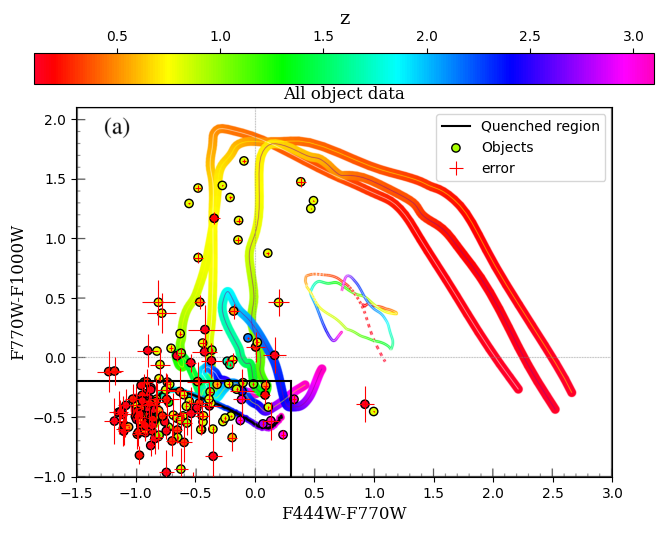

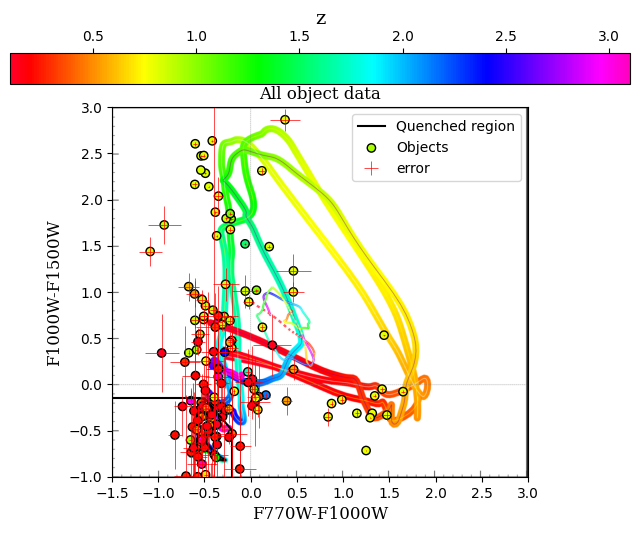

In [8]:
#figure plots:

#fig1 plot
plt.figure(figsize=(8, 6))
plt.plot(boxh[0], boxh[1], color="k", label="Quenched region")
plt.plot(boxv[0], boxv[1], color="k")
implot = plt.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
allplot1 = plt.scatter(M47, M710fig1, c=redfig1, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
plt.colorbar(allplot1, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.errorbar(M47, M710fig1, yerr=M710fig1e, xerr=M47e, linestyle = "", color="r", label = "error", elinewidth=0.8)
plt.title("All object data", **newfont, fontsize=12)
plt.xlabel("F444W-F770W", **newfont, fontsize=12)
plt.ylabel("F770W-F1000W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.legend()
#plt.grid()
plt.show()

#fig2 plot
plt.figure(figsize=(8, 6))
plt.plot(fictdatlinear[0], fictdatlinear[1], color="k", label="Quenched region")
plt.plot(fictdathline[0], fictdathline[1], color="k")
plt.plot(fictdatvline[0], fictdatvline[1], color="k")
implot = plt.imshow(fig2, extent=[-1.5, 3, -1, 3])
allplot2 = plt.scatter(M710fig2, M115, c=redfig2, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
plt.colorbar(allplot2, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.errorbar(M710fig2, M115, yerr=M115e, xerr=M710fig2e, linestyle = "", color="r", label = "error", elinewidth=0.5) #VERY large errors
plt.title("All object data", **newfont, fontsize=12)
plt.xlabel("F770W-F1000W", **newfont, fontsize=12)
plt.ylabel("F1000W-F1500W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 3)
plt.legend()
#plt.grid()
plt.show()

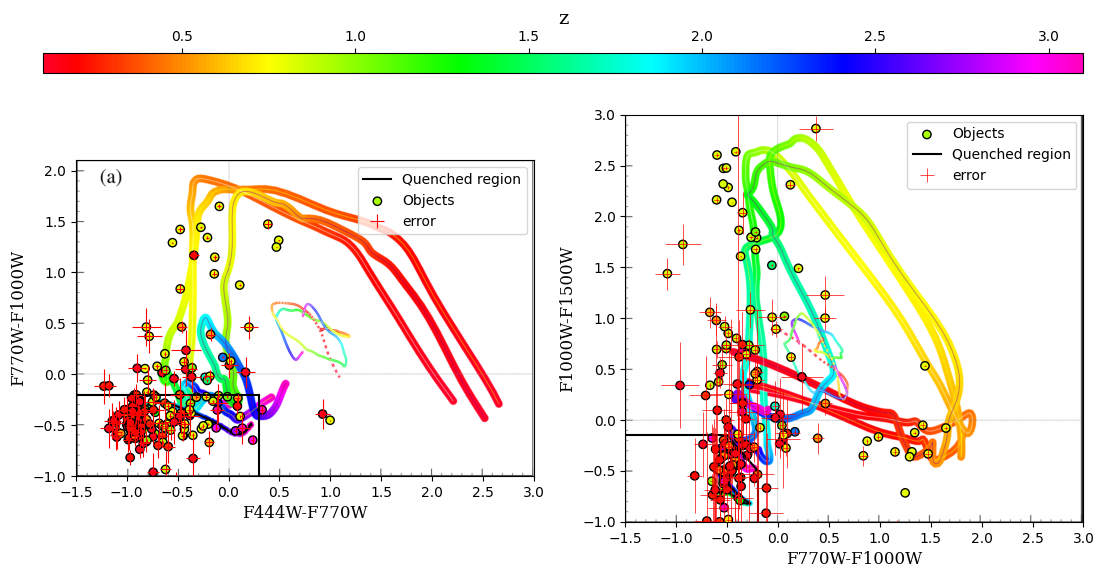

In [9]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(13,10))
#plt.title("All object data", **newfont, fontsize=12)
cbar_ax = fig.add_axes([0.1, 0.85, 0.8, 0.02])
fig.subplots_adjust(top=1.1)
#plt.subplots(1, 2, gridspec_kw={"height_ratios": [2.1:3]})
P1 = fig.add_subplot(1, 2, 1) 
P2 = fig.add_subplot(1, 2, 2)
P1.plot(boxh[0], boxh[1], color="k", label="Quenched region")
P1.plot(boxv[0], boxv[1], color="k")
implot = P1.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
allplot1 = P1.scatter(M47, M710fig1, c=redfig1, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
fig.colorbar(allplot1, cax=cbar_ax, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
P1.errorbar(M47, M710fig1, yerr=M710fig1e, xerr=M47e, linestyle = "", color="r", label = "error", elinewidth=0.8)
P1.set_xlabel("F444W-F770W", **newfont, fontsize=12)
P1.set_ylabel("F770W-F1000W", **newfont, fontsize=12)
P1.set_xlim(-1.5, 3)
P1.set_ylim(-1, 2.1)
P1.legend()

allplot2 = P2.scatter(M710fig2, M115, c=redfig2, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
P2.plot(fictdatlinear[0], fictdatlinear[1], color="k", label="Quenched region")
P2.plot(fictdathline[0], fictdathline[1], color="k")
P2.plot(fictdatvline[0], fictdatvline[1], color="k")
implot = P2.imshow(fig2, extent=[-1.5, 3, -1, 3])
P2.errorbar(M710fig2, M115, yerr=M115e, xerr=M710fig2e, linestyle = "", color="r", label = "error", elinewidth=0.5) #VERY large errors
P2.set_xlabel("F770W-F1000W", **newfont, fontsize=12)
P2.set_ylabel("F1000W-F1500W", **newfont, fontsize=12)
P2.set_xlim(-1.5, 3)
P2.set_ylim(-1, 3)
P2.legend()



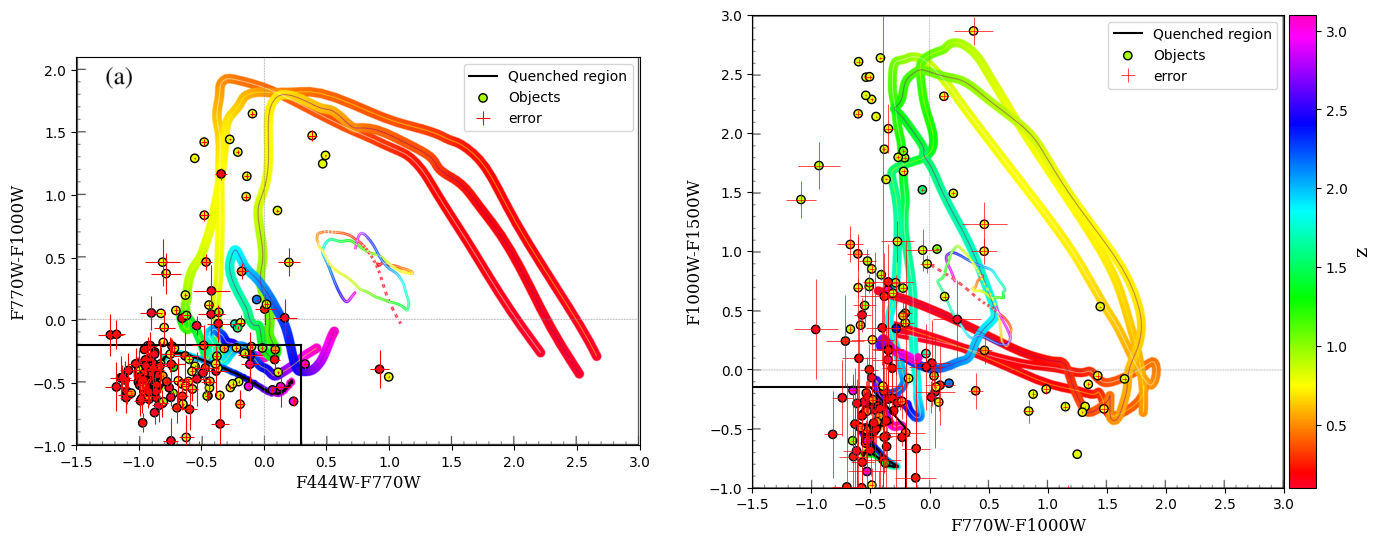

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(121)
ax1.plot(boxh[0], boxh[1], color="k", label="Quenched region")
ax1.plot(boxv[0], boxv[1], color="k")
im1 = ax1.scatter(M47, M710fig1, c=redfig1, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
ax1.errorbar(M47, M710fig1, yerr=M710fig1e, xerr=M47e, linestyle = "", color="r", label = "error", elinewidth=0.8)
ax1.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
ax1.set_xlabel("F444W-F770W", **newfont, fontsize=12)
ax1.set_ylabel("F770W-F1000W", **newfont, fontsize=12)

ax2 = fig.add_subplot(122)
ax2.plot(fictdatlinear[0], fictdatlinear[1], color="k", label="Quenched region")
ax2.plot(fictdathline[0], fictdathline[1], color="k")
ax2.plot(fictdatvline[0], fictdatvline[1], color="k")
im2 = ax2.scatter(M710fig2, M115, c=redfig2, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
ax2.errorbar(M710fig2, M115, yerr=M115e, xerr=M710fig2e, linestyle = "", color="r", label = "error", elinewidth=0.5)
ax2.imshow(fig2, extent=[-1.5, 3, -1, 3])
ax2.set_xlabel("F770W-F1000W", **newfont, fontsize=12)
ax2.set_ylabel("F1000W-F1500W", **newfont, fontsize=12)

ax1.legend()
ax2.legend()
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical').set_label(label='z',size=14,**newfont)

In [11]:
#Finding SFGs with z=>2 for fig1 and fig2 plot:

#fig1 plot:
SFGM47 = np.array([]) #SFG in front of the name means it´s only SFGs with z>=2
SFGM710 = np.array([])
SFGM47e = np.array([]) 
SFGM710e = np.array([])
SFGred = np.array([])
for i in range(len(M47)):
    if M47[i] > 0.3 or M710fig1[i] > -0.2:
        if redfig1[i] >= 2:
            SFGM47 = np.append(SFGM47, M47[i])
            SFGM710 = np.append(SFGM710, M710fig1[i])
            SFGM47e = np.append(SFGM47e, M47e[i])
            SFGM710e = np.append(SFGM710e, M710fig1e[i])
            SFGred = np.append(SFGred, redfig1[i])

#fig2 plot
SFGM115 = np.array([]) #SFG in front of the name means it´s only SFGs with z>=2
SFGM710fig2 = np.array([]) #We already have one, so fig2 indicates it´s for the second figure
SFGM115e = np.array([]) 
SFGM710fig2e = np.array([])
SFGredfig2 = np.array([]) # same as with SFGM710fig2
for i in range(len(M710fig2)):
    if M710fig2[i] > -0.2 or M710fig2[i] <-0.5:
        if M710fig2[i] > -0.2 or M115[i] > -0.15:
            if redfig2[i] >=2:
                SFGM115 = np.append(SFGM115, M115[i])
                SFGM710fig2 = np.append(SFGM710fig2, M710fig2[i])
                SFGM115e = np.append(SFGM115e, M115e[i])
                SFGM710fig2e = np.append(SFGM710fig2e, M710fig2e[i])
                SFGredfig2 = np.append(SFGredfig2, redfig2[i])
    if M710fig2[i] <= -0.2 or M710fig2[i] >= -0.5:
        if M115[i] >= fictslope[0]*M710fig2[i]+fictslope[1]:
            if redfig2[i] >=2:
                SFGM115 = np.append(SFGM115, M115[i])
                SFGM710fig2 = np.append(SFGM710fig2, M710fig2[i])
                SFGredfig2 = np.append(SFGredfig2, redfig2[i])
                SFGM115e = np.append(SFGM115e, M115e[i])
                SFGM710fig2e = np.append(SFGM710fig2e, M710fig2e[i])




[2.1479 3.0823]


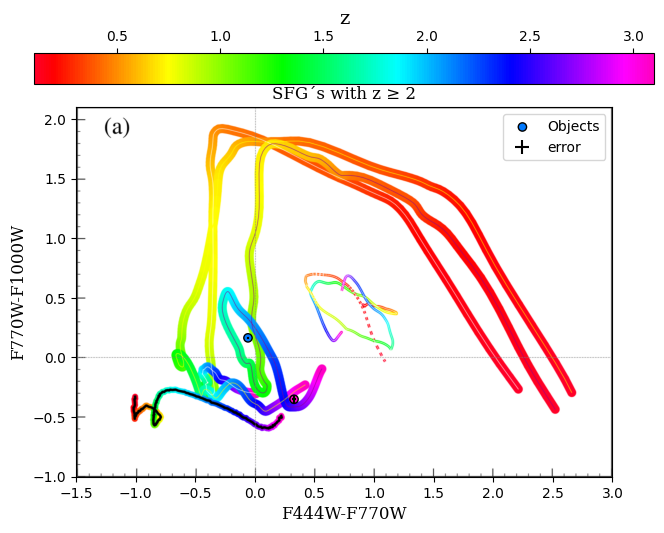

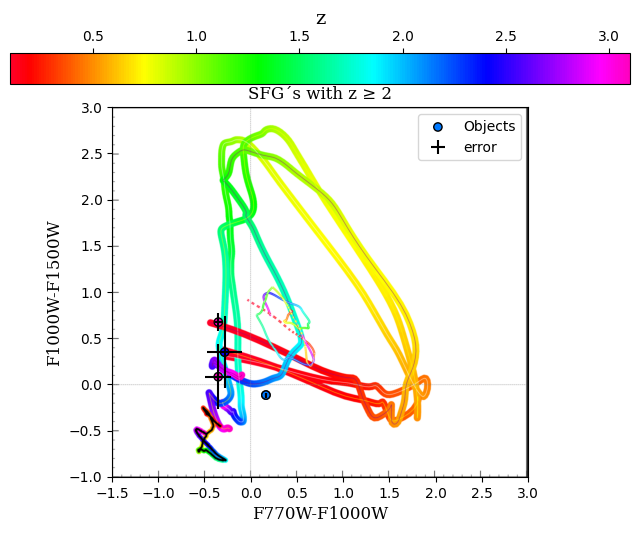

In [12]:
#Plotting the new fig1 and fig2 plots:

#fig1:
print(SFGred)
plt.figure(figsize=(8, 6))
implot = plt.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
SFGplot1 = plt.scatter(SFGM47, SFGM710, c=SFGred, marker="o",  label = "Objects", vmin=0.1, vmax=3.1, cmap=sm, edgecolors="k")
plt.colorbar(SFGplot1, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.errorbar(SFGM47, SFGM710, yerr=SFGM710e, xerr=SFGM47e, linestyle = "", color="k", label = "error")
plt.title("SFG´s with z ≥ 2", **newfont, fontsize=12)
plt.xlabel("F444W-F770W", **newfont, fontsize=12)
plt.ylabel("F770W-F1000W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.legend()
#plt.grid()
plt.show()

#fig2:
plt.figure(figsize=(8, 6))
implot = plt.imshow(fig2, extent=[-1.5, 3, -1, 3])
SFGplot2 = plt.scatter(SFGM710fig2, SFGM115, c=SFGredfig2, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
plt.colorbar(SFGplot2, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.errorbar(SFGM710fig2, SFGM115, yerr=SFGM115e, xerr=SFGM710fig2e, linestyle = "", color="k", label = "error") #VERY large errors
plt.title("SFG´s with z ≥ 2", **newfont, fontsize=12)
plt.xlabel("F770W-F1000W", **newfont, fontsize=12)
plt.ylabel("F1000W-F1500W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 3)
plt.legend()
#plt.grid()
plt.show()

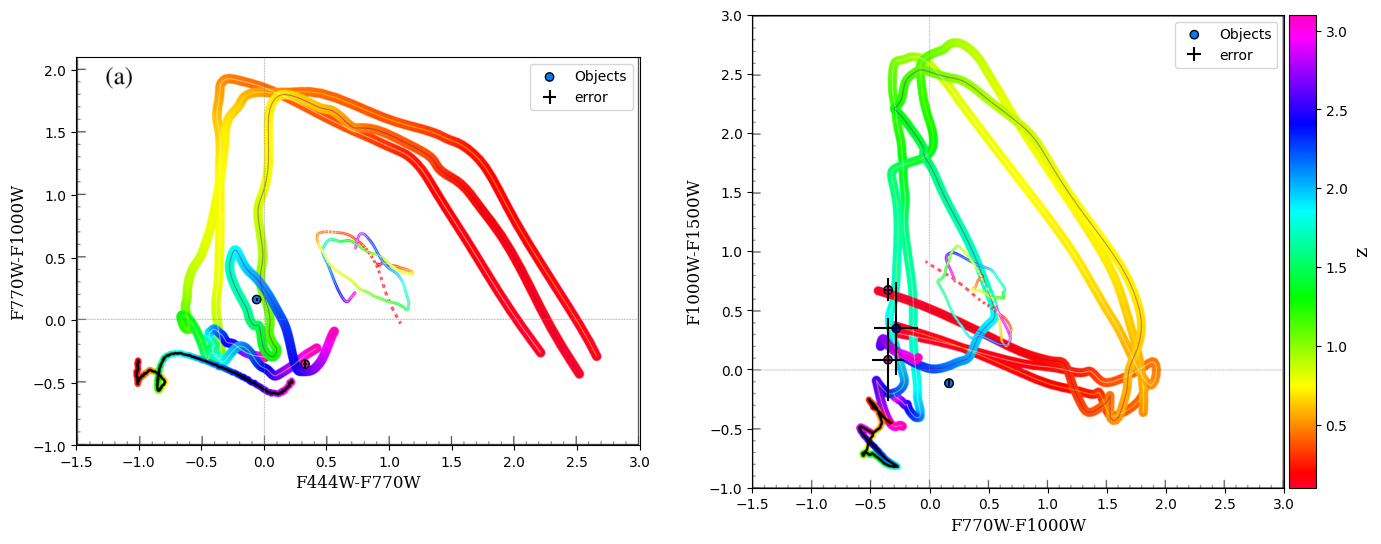

In [13]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

im2 = ax1.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
plot1 = ax1.scatter(SFGM47, SFGM710, c=SFGred, marker="o",  label = "Objects", vmin=0.1, vmax=3.1, cmap=sm, edgecolors="k")
ax1.errorbar(SFGM47, SFGM710, yerr=SFGM710e, xerr=SFGM47e, linestyle = "", color="k", label = "error")
ax1.set_xlabel("F444W-F770W", **newfont, fontsize=12)
ax1.set_ylabel("F770W-F1000W", **newfont, fontsize=12)
# ax1.set_title("Plot 1")

im2 = ax2.imshow(fig2, extent=[-1.5, 3, -1, 3])
plot2 = ax2.scatter(SFGM710fig2, SFGM115, c=SFGredfig2, marker="o", vmin=0.1, vmax=3.1, label = "Objects", cmap=sm, edgecolors="k")
ax2.errorbar(SFGM710fig2, SFGM115, yerr=SFGM115e, xerr=SFGM710fig2e, linestyle = "", color="k", label = "error") #VERY large errors
ax2.set_xlabel("F770W-F1000W", **newfont, fontsize=12)
ax2.set_ylabel("F1000W-F1500W", **newfont, fontsize=12)
# ax2.set_title("Plot 2")

ax1.legend()
ax2.legend()
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot2, cax=cax, orientation='vertical').set_label(label='z',size=14,**newfont)

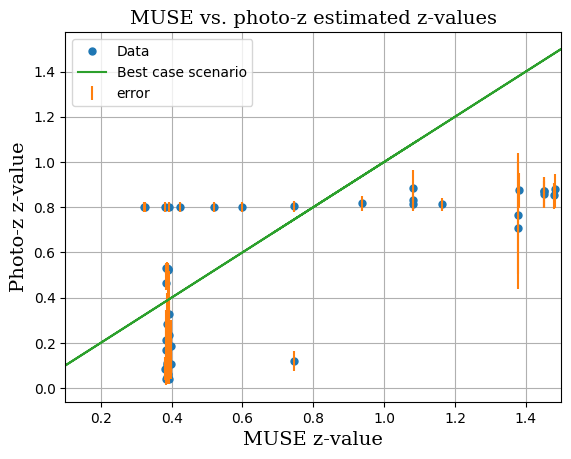

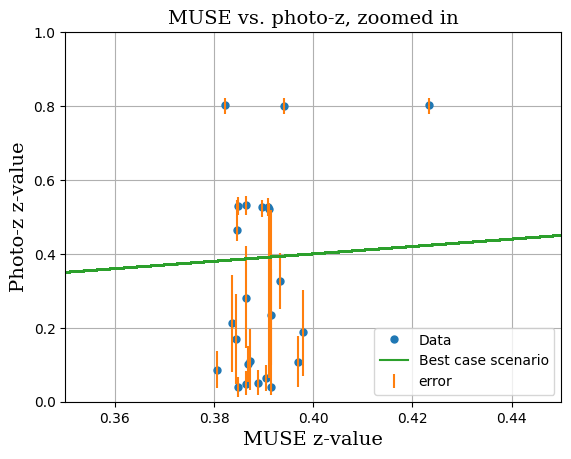

In [14]:
#plotting MUSE vs. phot-z line, along with the theoretical line. Zoomed in on 0.4 and all data.
line = np.random.uniform(0.1, 1.5, (10000)) #the line

#not zoomed in:
plt.plot(museshift, musecompare, ".", label="Data", markersize=10)
plt.errorbar(museshift, musecompare, yerr=([lower_limit, upper_limit]), linestyle="", label="error")
plt.title("MUSE vs. photo-z estimated z-values", **newfont, fontsize=14)
plt.xlabel("MUSE z-value", **newfont, fontsize=14)
plt.ylabel("Photo-z z-value", **newfont, fontsize=14)
plt.plot(line, line, label="Best case scenario")
plt.xlim(0.1, 1.5)
plt.legend()
plt.grid()
plt.show()

#zoomed in:
plt.plot(museshift, musecompare, ".", label="Data", markersize=10)
plt.errorbar(museshift, musecompare, yerr=([lower_limit, upper_limit]), linestyle="", label="error")
plt.title("MUSE vs. photo-z, zoomed in", **newfont, fontsize=14)
plt.xlabel("MUSE z-value", **newfont, fontsize=14)
plt.ylabel("Photo-z z-value", **newfont, fontsize=14)
plt.plot(line, line, label="Best case scenario")
plt.xlim(0.35, 0.45)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

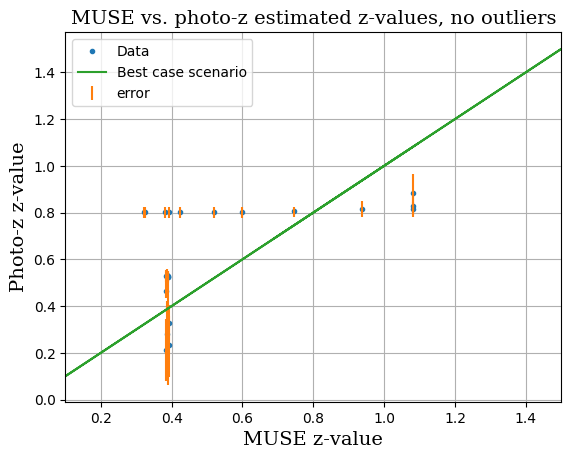

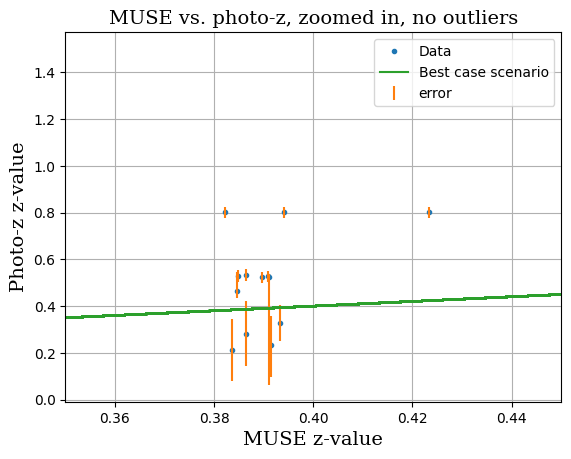

In [15]:
#same as last code block, just without outliers:

#all data:
plt.plot(muse2, phot2, ".", label="Data")
plt.errorbar(muse2, phot2, yerr=([photer2l, photer2u]), linestyle="", label="error")
plt.title("MUSE vs. photo-z estimated z-values, no outliers", **newfont, fontsize=14)
plt.xlabel("MUSE z-value", **newfont, fontsize=14)
plt.ylabel("Photo-z z-value", **newfont, fontsize=14)
plt.plot(line, line, label="Best case scenario")
plt.xlim(0.1, 1.5)
plt.legend()
plt.grid()
plt.show()

#zoomed in:
plt.plot(muse2, phot2, ".", label="Data")
plt.errorbar(muse2, phot2, yerr=([photer2l, photer2u]), linestyle="", label="error")
plt.title("MUSE vs. photo-z, zoomed in, no outliers", **newfont, fontsize=14)
plt.xlabel("MUSE z-value", **newfont, fontsize=14)
plt.ylabel("Photo-z z-value", **newfont, fontsize=14)
plt.plot(line, line, label="Best case scenario")
plt.xlim(0.35, 0.45)
plt.legend()
plt.grid()
plt.show()

In [16]:
for i in lists:
    if float(catalogue[i]["f1500w"]["MAGERR_APER"]) > 1:
        print("ERR:", catalogue[i]["f1500w"]["MAGERR_AUTO"], "FLUX_AUTO:", catalogue[i]["f1500w"]["FLUX_AUTO"])

ERR: 99.0000 FLUX_AUTO: -24.34523
ERR: 99.0000 FLUX_AUTO: -0.2389588
ERR: 99.0000 FLUX_AUTO: -1.052331
ERR: 99.0000 FLUX_AUTO: -0.6992227
ERR: 99.0000 FLUX_AUTO: -6.117955
ERR: 99.0000 FLUX_AUTO: -7.864084
ERR: 1.5539 FLUX_AUTO: 1.283899
ERR: 99.0000 FLUX_AUTO: -1.205328
ERR: 2.5045 FLUX_AUTO: 0.2276452
ERR: 2.0464 FLUX_AUTO: 1.436221
ERR: 99.0000 FLUX_AUTO: -5.160812
ERR: 99.0000 FLUX_AUTO: -0.1724764
ERR: 99.0000 FLUX_AUTO: -3.470228
ERR: 99.0000 FLUX_AUTO: -10.81345
ERR: 99.0000 FLUX_AUTO: -8.441199
ERR: 99.0000 FLUX_AUTO: -11.45173
ERR: 99.0000 FLUX_AUTO: -8.391489
ERR: 99.0000 FLUX_AUTO: -1.410468


In [17]:
# Added fake errors, since they should be positive, and are not allowed to be negative. Here they are made positive with the abs() function.

for i in lists:
    if float(catalogue[i]["f1500w"]["FLUX_AUTO"]) < 0:
        cheat_err = 2.5/np.log(10) * float(catalogue[i]["f1500w"]["FLUXERR_AUTO"]) / abs(float(catalogue[i]["f1500w"]["FLUX_AUTO"]))
        Flux = float(catalogue[i]["f1500w"]["FLUX_AUTO"])
        print(f"FLUX_AUTO = {Flux}: ERROR = {cheat_err}")

FLUX_AUTO = -45.90685: ERROR = 0.10615988527400753
FLUX_AUTO = -28.55627: ERROR = 0.14252358165219442
FLUX_AUTO = -4.002069: ERROR = 0.4561323787752166
FLUX_AUTO = -24.34523: ERROR = 0.09388111046670841
FLUX_AUTO = -0.2389588: ERROR = 5.373598808738166
FLUX_AUTO = -1.052331: ERROR = 0.8039376143643653
FLUX_AUTO = -0.6992227: ERROR = 2.04244386935465
FLUX_AUTO = -1.586226: ERROR = 0.752368906889355
FLUX_AUTO = -6.117955: ERROR = 0.13522053010948606
FLUX_AUTO = -7.864084: ERROR = 0.19721944504922417
FLUX_AUTO = -0.4425488: ERROR = 3.5077360227558914
FLUX_AUTO = -1.205328: ERROR = 0.5349281708609713
FLUX_AUTO = -0.2837986: ERROR = 4.712168108234543
FLUX_AUTO = -0.0726614: ERROR = 24.408391787111103
FLUX_AUTO = -5.160812: ERROR = 0.3528043290317654
FLUX_AUTO = -0.1724764: ERROR = 4.797745463613375
FLUX_AUTO = -3.470228: ERROR = 0.30580413602056294
FLUX_AUTO = -32.22223: ERROR = 0.13583072180352965
FLUX_AUTO = -10.81345: ERROR = 0.20101539652883113
FLUX_AUTO = -8.441199: ERROR = 0.138161273

In [18]:
catalogue[2]["f770w"].keys()

dict_keys(['NUMBER', 'EXT_NUMBER', 'MAG_APER', 'MAGERR_APER', 'FLUX_AUTO', 'FLUXERR_AUTO', 'MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'CLASS_STAR'])

In [24]:
""" Data = []
index = 1
# muse = 0
for i in lists:
    if index == 1:
        Data.append(["Ra", "Dec", "F277W", "F356W", "F444W", "F770W", "F1000W", "F1500W", "photo-z", "spec-z"])
    if index <=10:
        if "MUSE_data" in catalogue[i].keys():
            Data.append([np.round(float(catalogue[i]["f444w"]["ALPHA_SKY"]),2), np.round(float(catalogue[i]["f444w"]["DELTA_SKY"]),2), np.round(float(catalogue[i]["f277w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f356w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f444w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f770w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f1000w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f1500w"]["MAG_APER"]),2), np.round(float(catalogue[i]["photo-z"]),2), np.round(float(catalogue[i]["MUSE_data"]["z_muse"]),2)])
            # muse += 1
        if "MUSE_data" not in catalogue[i].keys():
            Data.append([np.round(float(catalogue[i]["f444w"]["ALPHA_SKY"]),2), np.round(float(catalogue[i]["f444w"]["DELTA_SKY"]),2), np.round(float(catalogue[i]["f277w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f356w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f444w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f770w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f1000w"]["MAG_APER"]),2), np.round(float(catalogue[i]["f1500w"]["MAG_APER"]),2), np.round(float(catalogue[i]["photo-z"]),2), "N/A" ])
    index += 1 """

Data = []
index = 0
for i in lists:
    if index == 0:
        Data.append(["ID", "Ra", "Dec", "F444W", "E444W", "photo-z", "spec-z", "photo-z-error"])
    if index <= 8:
        if "MUSE_data" in catalogue[i].keys():
            Data.append([i, np.round(float(catalogue[i]["f444w"]["ALPHA_SKY"]), 2), np.round(float(catalogue[i]["f444w"]["DELTA_SKY"]),2),np.round(float(catalogue[i]["f444w"]["MAG_APER"]),2),np.round(float(catalogue[i]["f444w"]["MAGERR_APER"]), 2), np.round(float(catalogue[i]["photo-z"]),2), np.round(float(catalogue[i]["MUSE_data"]["z_muse"]),2), np.round(upper_limit[index], 2), np.round(lower_limit[index], 2)])
            index += 1
        else:
            Data.append([i, np.round(float(catalogue[i]["f444w"]["ALPHA_SKY"]), 2), np.round(float(catalogue[i]["f444w"]["DELTA_SKY"]),2),np.round(float(catalogue[i]["f444w"]["MAG_APER"]),2),np.round(float(catalogue[i]["f444w"]["MAGERR_APER"]), 2),np.round(float(catalogue[i]["photo-z"]),2), "N/A", np.round(upper_limit[index], 2), np.round(lower_limit[index], 2)])
            index += 1
    if index > 8 and index <= 10:
        if "MUSE_data" in catalogue[i].keys():
            Data.append([i, np.round(float(catalogue[i]["f444w"]["ALPHA_SKY"]), 2), np.round(float(catalogue[i]["f444w"]["DELTA_SKY"]),2),np.round(float(catalogue[i]["f444w"]["MAG_APER"]),2),np.round(float(catalogue[i]["f444w"]["MAGERR_APER"]), 2),np.round(float(catalogue[i]["photo-z"]),2), np.round(float(catalogue[i]["MUSE_data"]["z_muse"]),2), np.round(upper_limit[index], 2), np.round(lower_limit[index], 2)])
            index += 1
""" Data = []
index = 0
for i in lists:
    if index == 0:
        Data.append(["ID", "Ra", "Dec", "F444W", "E444W", "photo-z", "spec-z"])
    if index <= 8:
        if "MUSE_data" in catalogue[i].keys():
            Data.append([i, (catalogue[i]["f444w"]["ALPHA_SKY"]), (catalogue[i]["f444w"]["DELTA_SKY"]),(catalogue[i]["f444w"]["MAG_APER"]),(catalogue[i]["f444w"]["MAGERR_APER"]), (catalogue[i]["photo-z"]), (catalogue[i]["MUSE_data"]["z_muse"])])
            # index += 1
        else:
            Data.append([i, (catalogue[i]["f444w"]["ALPHA_SKY"]), (catalogue[i]["f444w"]["DELTA_SKY"]),(catalogue[i]["f444w"]["MAG_APER"]),(catalogue[i]["f444w"]["MAGERR_APER"]),(catalogue[i]["photo-z"]), "N/A"])
        index += 1
    if index > 8 and index <= 10:
        if "MUSE_data" in catalogue[i].keys():
            Data.append([i, (catalogue[i]["f444w"]["ALPHA_SKY"]), (catalogue[i]["f444w"]["DELTA_SKY"]),(catalogue[i]["f444w"]["MAG_APER"]),(catalogue[i]["f444w"]["MAGERR_APER"]),(catalogue[i]["photo-z"]), (catalogue[i]["MUSE_data"]["z_muse"])])
            index += 1 """

' Data = []\nindex = 0\nfor i in lists:\n    if index == 0:\n        Data.append(["ID", "Ra", "Dec", "F444W", "E444W", "photo-z", "spec-z"])\n    if index <= 8:\n        if "MUSE_data" in catalogue[i].keys():\n            Data.append([i, (catalogue[i]["f444w"]["ALPHA_SKY"]), (catalogue[i]["f444w"]["DELTA_SKY"]),(catalogue[i]["f444w"]["MAG_APER"]),(catalogue[i]["f444w"]["MAGERR_APER"]), (catalogue[i]["photo-z"]), (catalogue[i]["MUSE_data"]["z_muse"])])\n            # index += 1\n        else:\n            Data.append([i, (catalogue[i]["f444w"]["ALPHA_SKY"]), (catalogue[i]["f444w"]["DELTA_SKY"]),(catalogue[i]["f444w"]["MAG_APER"]),(catalogue[i]["f444w"]["MAGERR_APER"]),(catalogue[i]["photo-z"]), "N/A"])\n        index += 1\n    if index > 8 and index <= 10:\n        if "MUSE_data" in catalogue[i].keys():\n            Data.append([i, (catalogue[i]["f444w"]["ALPHA_SKY"]), (catalogue[i]["f444w"]["DELTA_SKY"]),(catalogue[i]["f444w"]["MAG_APER"]),(catalogue[i]["f444w"]["MAGERR_APER"]),(catalo

In [25]:
table = pd.DataFrame(data=Data)
print(table)

      0       1      2      3      4        5       6              7     8
0    ID      Ra    Dec  F444W  E444W  photo-z  spec-z  photo-z-error   NaN
1     2  110.79 -73.44  20.36    0.0     0.93     N/A           0.02  0.02
2     5  110.84 -73.44   20.8    0.0     0.81     N/A           0.05  0.06
3    17   110.8 -73.46  24.84   0.01     0.01     N/A           0.07  0.07
4    21  110.81 -73.47  21.04    0.0     0.08     N/A           0.03  0.03
5    26  110.81 -73.47   25.3   0.01     0.01     N/A           0.08  0.08
6    31   110.8 -73.47  23.19    0.0     0.19     N/A           0.06  0.07
7    32  110.85 -73.47  23.08    0.0     0.01     N/A           0.03  0.03
8    43  110.86 -73.47   23.0    0.0      3.0     N/A           0.13  0.13
9    46  110.86 -73.47   21.9    0.0     0.82     N/A            0.3  0.27
10  130  110.85 -73.46  24.94   0.01      0.8    0.32           0.04  0.05
11  158  110.85 -73.46  22.71    0.0     0.85    1.48           0.04  0.04


In [26]:
# table.to_latex(index=False)
Tabel = table.style.to_latex(
    column_format = "c|c|c|c|c|c|c|c|c|c|c",
    position="h", position_float="centering",
    hrules=True, label="Tabel", caption="Tabel af Værdier",
    multirow_align="t", multicol_align="r"
)
print(Tabel) # Viser et output som kan kopieres til rapporten. Kommenter den her linje ud når du ikke har brug for det.

\begin{table}[h]
\centering
\caption{Tabel af Værdier}
\label{Tabel}
\begin{tabular}{c|c|c|c|c|c|c|c|c|c|c}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\
\midrule
0 & ID & Ra & Dec & F444W & E444W & photo-z & spec-z & photo-z-error & nan \\
1 & 2 & 110.790000 & -73.440000 & 20.360000 & 0.000000 & 0.930000 & N/A & 0.020000 & 0.020000 \\
2 & 5 & 110.840000 & -73.440000 & 20.800000 & 0.000000 & 0.810000 & N/A & 0.050000 & 0.060000 \\
3 & 17 & 110.800000 & -73.460000 & 24.840000 & 0.010000 & 0.010000 & N/A & 0.070000 & 0.070000 \\
4 & 21 & 110.810000 & -73.470000 & 21.040000 & 0.000000 & 0.080000 & N/A & 0.030000 & 0.030000 \\
5 & 26 & 110.810000 & -73.470000 & 25.300000 & 0.010000 & 0.010000 & N/A & 0.080000 & 0.080000 \\
6 & 31 & 110.800000 & -73.470000 & 23.190000 & 0.000000 & 0.190000 & N/A & 0.060000 & 0.070000 \\
7 & 32 & 110.850000 & -73.470000 & 23.080000 & 0.000000 & 0.010000 & N/A & 0.030000 & 0.030000 \\
8 & 43 & 110.860000 & -73.470000 & 23.000000 & 0.000000 & 3.000000 & N/A